In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import CM4Xutils

In [37]:
local_path_to_budgets_zarr = "../../../codedev/CM4Xutils/data/coarsened/CM4Xp25_budgets_sigma2_2000-2004.zarr"
ds_sig2 = xr.open_zarr(local_path_to_budgets_zarr).fillna(0.).sel(exp="forced").isel(time=[0], time_bounds=[0,1])

ds = xr.open_zarr("../data/CM4Xp25_budget_slice_2000-01.zarr/")
ds = ds.assign_coords({"sigma2_l":ds_sig2.sigma2_l, "sigma2_i":ds_sig2.sigma2_i})

In [38]:
grid_xgcm = CM4Xutils.ds_to_grid(ds.copy(), Zprefix="z")
grid_xhis = CM4Xutils.ds_to_grid(ds.copy(), Zprefix="z")
grid_sig2 = CM4Xutils.ds_to_grid(ds_sig2)

Inferring Z grid coordinate: density `sigma2`


In [39]:
sig2_levels = [34, 35, 36, 36.5, 36.75, 36.9, 37]

ds_trans = xr.Dataset()
ds_trans["thkcello"] = grid_xgcm.transform(
    ds.thkcello.fillna(0.),
    "Z",
    xr.DataArray(np.array(sig2_levels), dims=("sig2_l",)),
    target_data=CM4Xutils.fillna_below(grid_xgcm, ds.sigma2),
    method="conservative"
)
ds_trans = ds_trans.assign_coords({"sig2_i":xr.DataArray(sig2_levels, dims=("sig2_i",))})
ds_trans = ds_trans.assign_coords(ds.coords)

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:464: UserWarning: The `target data` input is not located on the cell bounds. This method will continue with linear interpolation with repeated boundary values. For most accurate results provide values on cell bounds.
  warnings.warn(
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:245: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


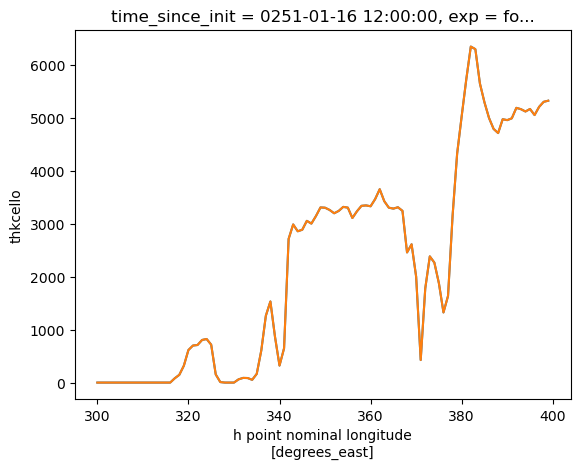

In [40]:
ds_slice=ds.isel(time=0, yh=720, xh=slice(300, 400), xq=slice(300, 401))
ds_slice["thkcello"].sum("z_l").plot()

ds_trans_slice=ds_trans.isel(time=0, yh=720, xh=slice(300, 400), xq=slice(300, 401))
ds_trans_slice["thkcello"].sum("sig2_l").plot()

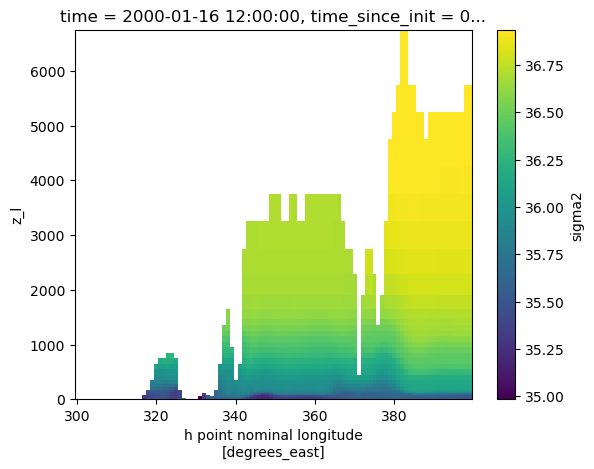

In [41]:
ds_slice.sigma2.plot()

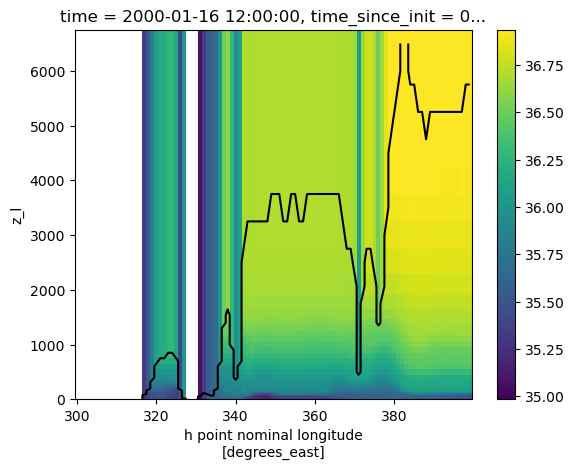

In [42]:
CM4Xutils.fillna_below(grid_xgcm, ds.sigma2.fillna(0.)).isel(time=0, yh=720, xh=slice(300, 400)).plot()
np.isnan(ds.sigma2).isel(time=0, yh=720, xh=slice(300, 400)).plot.contour(levels=[0.5], colors="k")

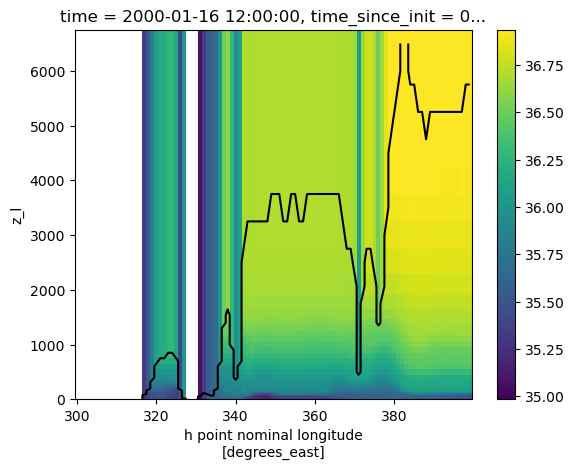

In [43]:
CM4Xutils.fillna_below(grid_xgcm, ds.sigma2).isel(time=0, yh=720, xh=slice(300, 400)).plot()
np.isnan(ds.sigma2).isel(time=0, yh=720, xh=slice(300, 400)).plot.contour(levels=[0.5], colors="k")

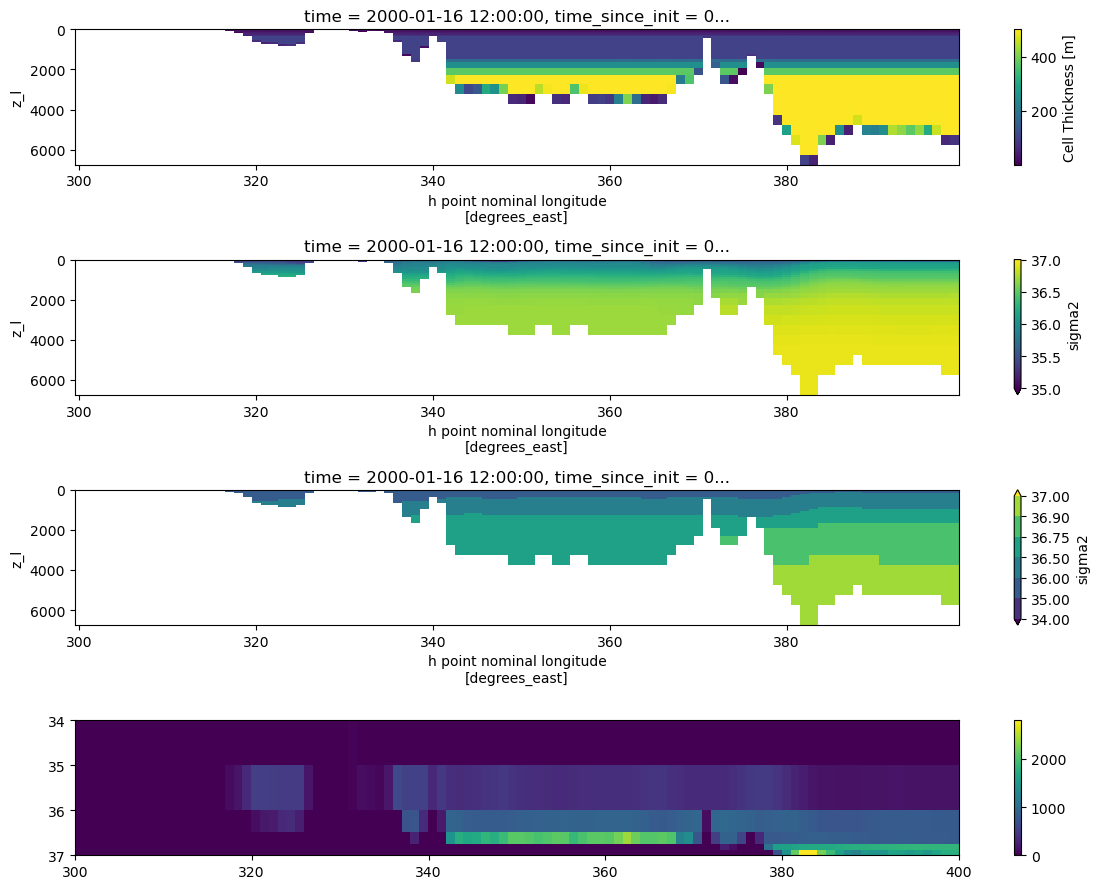

In [44]:
plt.figure(figsize=(12,9))
plt.subplot(4,1,1)
grid_xgcm._ds.thkcello.isel(time=0, yh=720, xh=slice(300, 400)).plot(yincrease=False)
plt.subplot(4,1,2)
grid_xgcm._ds.sigma2.isel(time=0, yh=720, xh=slice(300, 400)).plot(yincrease=False, vmin=35, vmax=37)
plt.subplot(4,1,3)
grid_xgcm._ds.sigma2.isel(time=0, yh=720, xh=slice(300, 400)).plot(yincrease=False, levels=sig2_levels, extend="both")
plt.subplot(4,1,4)
ds_trans_slice = ds_trans.isel(time=0, yh=720, xh=slice(300, 400), xq=slice(300, 401))
plt.pcolor(
    ds_trans_slice.xq,
    ds_trans_slice.sig2_i,
    ds_trans_slice.thkcello.transpose()
)
plt.colorbar()
plt.ylim(37, 34)
plt.tight_layout()

In [45]:
import xbudget
budgets_dict_xgcm = xbudget.load_preset_budget(model="MOM6_3Donly")
xbudget.collect_budgets(grid_xgcm, budgets_dict_xgcm)

budgets_dict_xhis = xbudget.load_preset_budget(model="MOM6_3Donly")
xbudget.collect_budgets(grid_xhis, budgets_dict_xhis)

budgets_dict_sig2 = xbudget.load_preset_budget(model="MOM6_3Donly")
xbudget.collect_budgets(grid_sig2, budgets_dict_sig2)

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, i

In [46]:
import xwmb

In [47]:
wmb_xgcm = xwmb.WaterMassBudget(grid_xgcm, budgets_dict_xgcm, method="xgcm")
wmb_xhis = xwmb.WaterMassBudget(grid_xhis, budgets_dict_xhis, method="xhistogram")
wmb_sig2 = xwmb.WaterMassBudget(grid_sig2, budgets_dict_sig2, method="default")

In [48]:
wmt_xgcm = wmb_xgcm.mass_budget("sigma2")
wmt_xhis = wmb_xhis.mass_budget("sigma2")
wmt_sig2 = wmb_sig2.mass_budget("sigma2")

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:245: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:245: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarnin

In [49]:
import matplotlib.pyplot as plt

(27.0, 38.0)

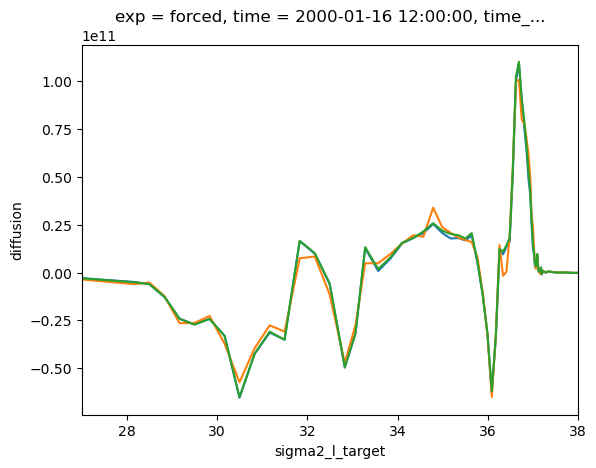

In [50]:
wmt_xgcm.diffusion.plot()
wmt_xhis.diffusion.plot()
wmt_sig2.diffusion.plot()
plt.xlim(27, 38)

(27.0, 38.0)

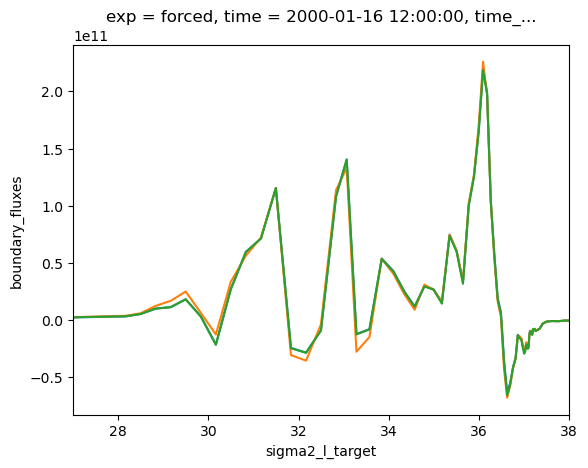

In [51]:
wmt_xgcm.boundary_fluxes.plot()
wmt_xhis.boundary_fluxes.plot()
wmt_sig2.boundary_fluxes.plot()
plt.xlim(27, 38)

(27.0, 38.0)

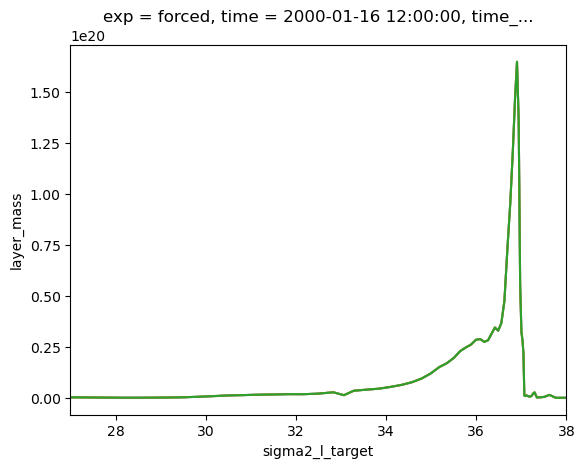

In [52]:
wmt_xgcm.layer_mass.plot()
wmt_xhis.layer_mass.plot()
wmt_sig2.layer_mass.plot()
plt.xlim(27, 38)

In [ ]:
w = wmb_xgcm
(
    w.grid._ds.mass_density_bounds.isel(time_bounds=1)*w.grid._ds.areacello -
    w.grid._ds.mass_density_bounds.isel(time_bounds=0)*w.grid._ds.areacello
).sum(["xh", "yh"]).plot()
w = wmb_xhis
(
    w.grid._ds.mass_density_bounds.isel(time_bounds=1)*w.grid._ds.areacello -
    w.grid._ds.mass_density_bounds.isel(time_bounds=0)*w.grid._ds.areacello
).sum(["xh", "yh"]).plot()
w = wmb_sig2
(
    w.grid._ds.mass_density_bounds.isel(time_bounds=1)*w.grid._ds.areacello -
    w.grid._ds.mass_density_bounds.isel(time_bounds=0)*w.grid._ds.areacello
).sum(["xh", "yh"]).plot()
plt.xlim(27, 38)

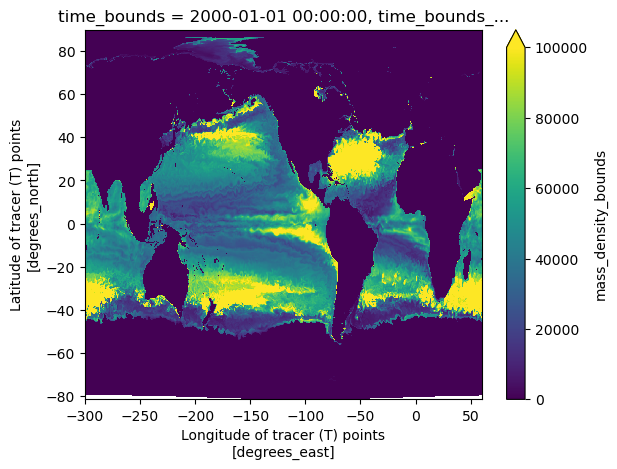

In [56]:
wmb_xhis.grid._ds.mass_density_bounds.isel(time_bounds=0).sel(sigma2_l_target=35.25, method="nearest").plot(
    x="geolon", y="geolat", vmin=0, vmax=1e5
)
#plt.ylim(40, 55)
#plt.xlim(-225, -175)

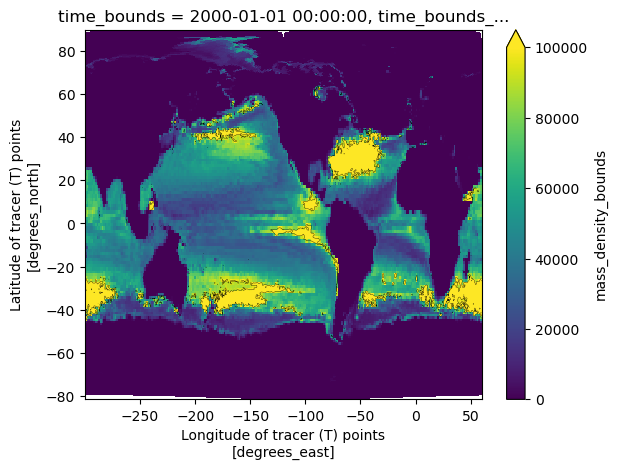

In [58]:
wmb_sig2.grid._ds.mass_density_bounds.isel(time_bounds=0).sel(sigma2_l_target=35.25, method="nearest").plot(
    x="geolon", y="geolat", vmin=0, vmax=1e5
)
wmb_xhis.grid._ds.mass_density_bounds.isel(time_bounds=0).sel(sigma2_l_target=35.25, method="nearest").plot.contour(
    x="geolon", y="geolat", levels=[1e5], colors="k", linewidths=[0.25]
)
#plt.ylim(40, 55)
#plt.xlim(-225, -175)

In [ ]:
wmb_xgcm.grid._ds.mass_density_bounds.isel(time_bounds=0).sel(sigma2_l_target=35.25, method="nearest").plot(robust=True)

In [ ]:
(
    wmb_xgcm.grid._ds.mass_density_bounds.isel(time_bounds=1, sigma2_l_target=30) -
    wmb_xgcm.grid._ds.mass_density_bounds.isel(time_bounds=0, sigma2_l_target=30)
).plot(robust=True)

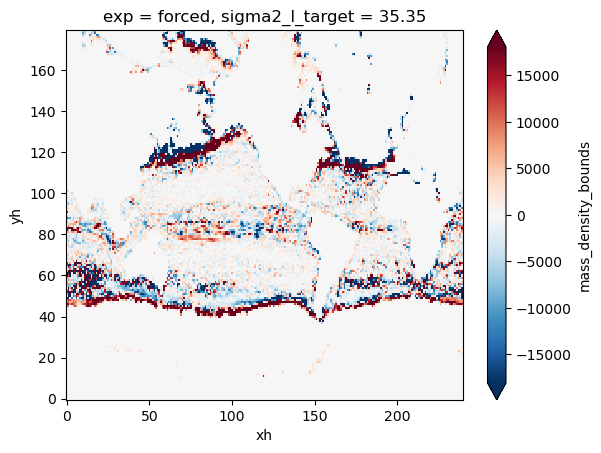

In [131]:
(
    wmb_sig2.grid._ds.mass_density_bounds.isel(time_bounds=1, sigma2_l_target=30) -
    wmb_sig2.grid._ds.mass_density_bounds.isel(time_bounds=0, sigma2_l_target=30)
).plot(robust=True)

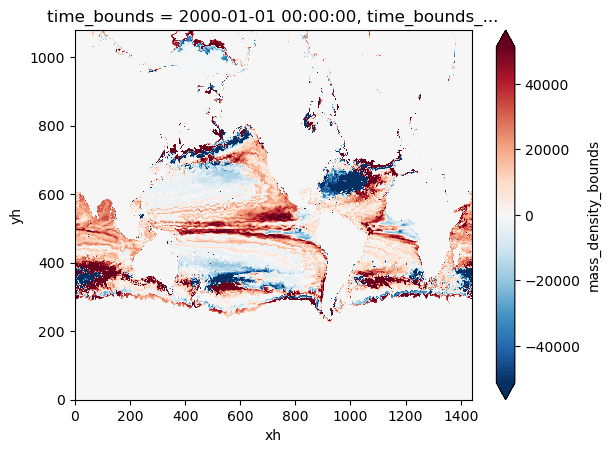

In [128]:
(
    wmb_xgcm.grid._ds.mass_density_bounds.isel(time_bounds=0, sigma2_l_target=30) -
    wmb_xgcm.grid._ds.mass_density_bounds.isel(time_bounds=0, sigma2_l_target=29)
).plot(robust=True)

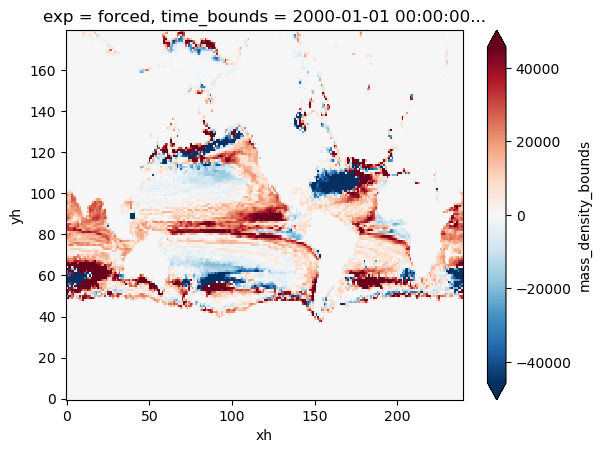

In [129]:
(
    wmb_sig2.grid._ds.mass_density_bounds.isel(time_bounds=0, sigma2_l_target=30) -
    wmb_sig2.grid._ds.mass_density_bounds.isel(time_bounds=0, sigma2_l_target=29)
).plot(robust=True)

In [ ]:
wmb_xgcm.grid._ds.mass_density_bounds.isel(time_bounds=0, sigma2_l_target=30).plot(robust=True)

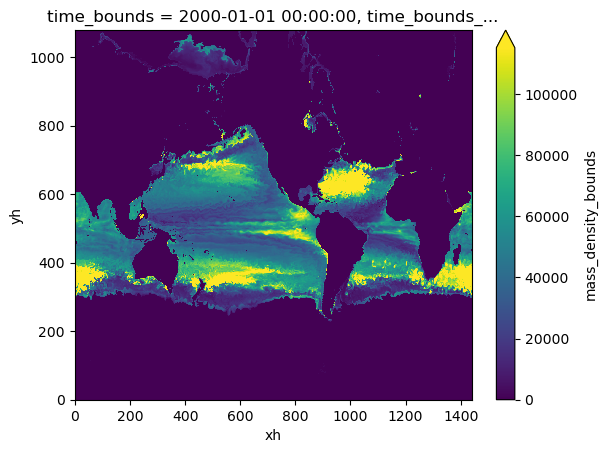

In [125]:
wmb_xhis.grid._ds.mass_density_bounds.isel(time_bounds=0).sel(sigma2_l_target=35.25, method="nearest").plot(robust=True)

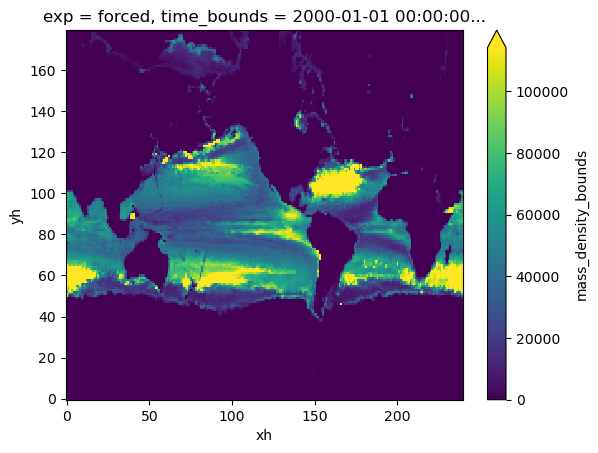

In [126]:
wmb_sig2.grid._ds.mass_density_bounds.isel(time_bounds=0).sel(sigma2_l_target=35.25, method="nearest").plot(robust=True)

In [ ]:
wmb_sig2.grid._ds.mass_density_bounds.isel(time_bounds=0).sel(sigma2_l_target=35.25, method="nearest")

(27.0, 38.0)

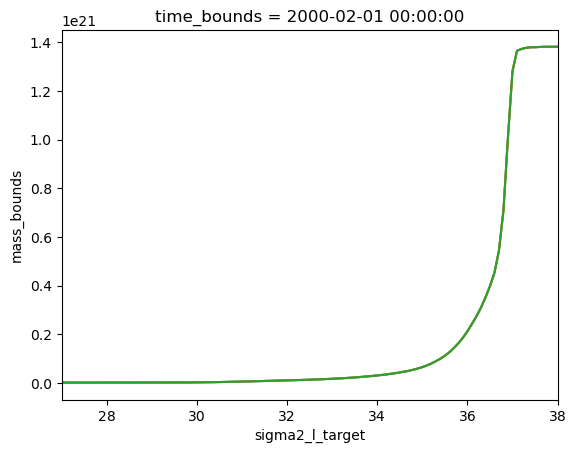

In [77]:
wmt_xgcm.mass_bounds.isel(time_bounds=1).plot()
wmt_xgcm.mass_bounds.isel(time_bounds=1).plot()
wmt_xgcm.mass_bounds.isel(time_bounds=1).plot()
plt.xlim(27, 38)

(27.0, 38.0)

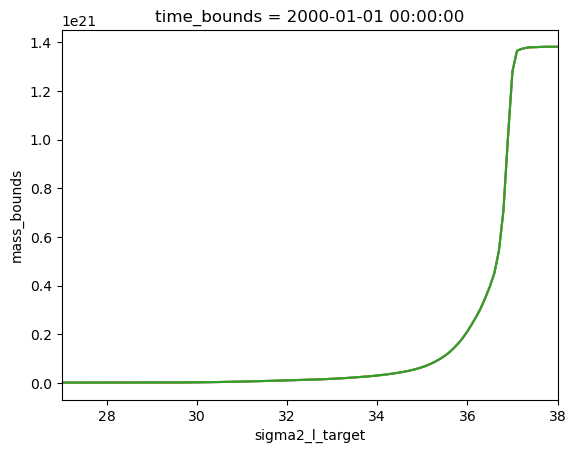

In [78]:
wmt_xgcm.mass_bounds.isel(time_bounds=0).plot()
wmt_xgcm.mass_bounds.isel(time_bounds=0).plot()
wmt_xgcm.mass_bounds.isel(time_bounds=0).plot()
plt.xlim(27, 38)

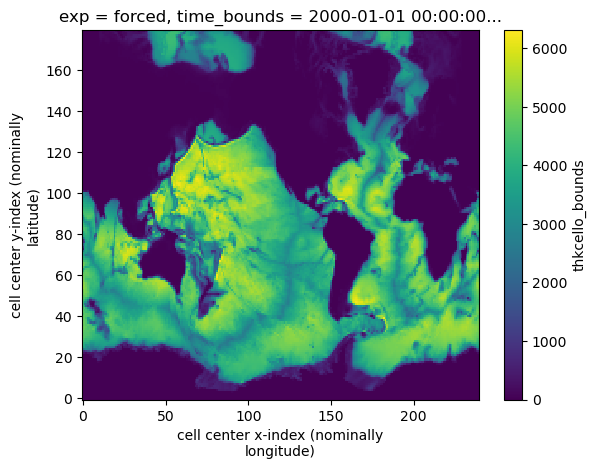

In [94]:
ds_sig2["thkcello_bounds"].sum("sigma2_l").isel(time_bounds=0).plot()

(27.0, 38.0)

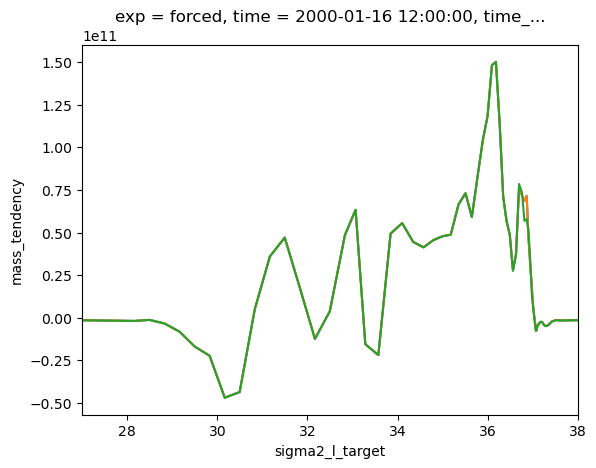

In [55]:
wmt_xgcm.mass_tendency.plot()
wmt_xhis.mass_tendency.plot()
wmt_sig2.mass_tendency.plot()
plt.xlim(27, 38)

In [59]:
ds_for_transform = xr.Dataset()
ds_for_transform[["thkcello", "umo", "vmo"]] = ds[["thkcello", "umo", "vmo"]].fillna(0.)
ds_for_transform["sigma2"] = ds.sigma2
ds_for_transform = ds_for_transform.assign_coords(ds.coords).drop_dims(["time_bounds","nv"]).drop_vars(["exp"])

In [60]:
ds_for_transform.attrs = {"description": "An example netcdf file containing variables required to test vertical coordinate transformations in MOM6. All variables are provided on the high-resolution (eddy-permitting) native horizontal grid; they have been transformed online from the native hybrid vertical coordinate to constant depth bins."}
ds_for_transform.to_netcdf("../data/MOM6_global_example_density_remap.nc", mode="w")